In [1]:
# Import the modules
import pandas as pd
from pathlib import Path
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path("Resources/dataset_clean.csv")
df = pd.read_csv(file_path)

# Review the DataFrame
df.head()

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of spondylolisthesis,Results
0,63.03,22.55,39.61,40.48,98.67,-0.25,Abnormal
1,39.06,10.06,25.02,29.00,114.41,4.56,Abnormal
2,68.83,22.22,50.09,46.61,105.99,-3.53,Abnormal
3,69.30,24.65,44.31,44.64,101.87,11.21,Abnormal
4,49.71,9.65,28.32,40.06,108.17,7.92,Abnormal


In [3]:
# Separate the data into labels and features

# Separate the y variable, the label
y = df['Results']

# Separate the X variable, the features
x = df.drop(columns='Results')

In [4]:
# Review the y variable Series
y.head()

0    Abnormal
1    Abnormal
2    Abnormal
3    Abnormal
4    Abnormal
Name: Results, dtype: object

In [5]:
# Review the X variable DataFrame
x.head()

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of spondylolisthesis
0,63.03,22.55,39.61,40.48,98.67,-0.25
1,39.06,10.06,25.02,29.00,114.41,4.56
2,68.83,22.22,50.09,46.61,105.99,-3.53
3,69.30,24.65,44.31,44.64,101.87,11.21
4,49.71,9.65,28.32,40.06,108.17,7.92


In [6]:
# Check the balance of our target values
print(y.value_counts())

Abnormal    210
Normal      100
Name: Results, dtype: int64


In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

# Fit the model using training data
classifier.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [9]:
# Make a prediction using the testing data
predictions = classifier.predict(x_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
78,Abnormal,Abnormal
244,Abnormal,Normal
185,Abnormal,Abnormal
70,Abnormal,Abnormal
120,Abnormal,Abnormal
...,...,...
225,Normal,Normal
294,Normal,Normal
39,Abnormal,Abnormal
80,Abnormal,Abnormal


In [10]:
# Print the training & testing data score of the model
print(f"Training Data Score: {classifier.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier.score(x_test, y_test)}")

Training Data Score: 0.8405172413793104
Testing Data Score: 0.8717948717948718


In [11]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.8717948717948718

In [12]:
# Print the classification report for the model
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

    Abnormal       0.89      0.93      0.91        55
      Normal       0.81      0.74      0.77        23

    accuracy                           0.87        78
   macro avg       0.85      0.83      0.84        78
weighted avg       0.87      0.87      0.87        78



Abnormal    210
Normal      100
Name: Results, dtype: int64 



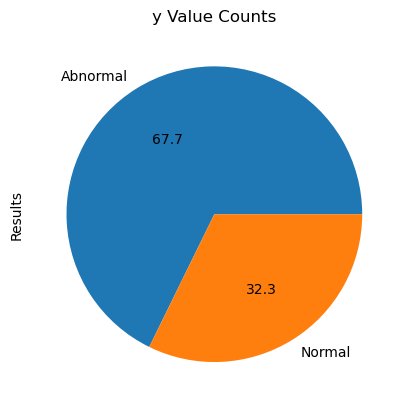

In [13]:
# Check the balance of our target values
print(y.value_counts(),'\n')

# plot results
ax1 = y.value_counts().plot.pie(autopct='%1.1f')
_=ax1.set_title("y Value Counts")

In [14]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Clearly disinguish resample x and y
y_res = y
x_res = x

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(sampling_strategy='not majority', random_state=1)

# Fit the original training data to the random_oversampler model
x_res, y_res = ros.fit_resample(x, y)

Abnormal    210
Normal      210
Name: Results, dtype: int64 



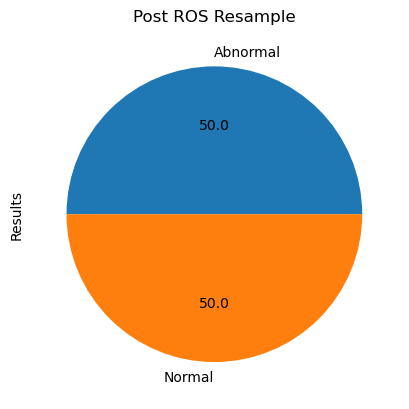

In [15]:
# Count the distinct values of the resampled labels data
print(y_res.value_counts(),'\n')

# plot results
ax = y_res.value_counts().plot.pie(autopct='%1.1f')
_=ax.set_title("Post ROS Resample")

In [16]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier2 = LogisticRegression(solver='lbfgs', random_state=1)
classifier2

# Fit the model using resampled data
classifier2.fit(x_res, y_res)

# Make a prediction using the resampled data
predictions_res = classifier2.predict(x_res)
pd.DataFrame({"Prediction": predictions_res, "Actual": y_res})

,Prediction,Actual
0,Abnormal,Abnormal
1,Abnormal,Abnormal
2,Normal,Abnormal
3,Abnormal,Abnormal
4,Abnormal,Abnormal
...,...,...
415,Normal,Normal
416,Normal,Normal
417,Normal,Normal
418,Normal,Normal


In [17]:
# Print the training & testing data score of the model
print(f"Training Data Score: {classifier2.score(x_train, y_train)}")
print(f"Testing Data Score: {classifier2.score(x_res, y_res)}")

Training Data Score: 0.8318965517241379
Testing Data Score: 0.85


In [18]:
# Calculate the accuracy score
acc_score_res = accuracy_score(y_res, predictions_res)
acc_score_res

0.85

In [19]:
# Print the classification report for the model
print("Classification Report Resampled Data")
print(classification_report(y_res, predictions_res))

Classification Report Resampled Data
              precision    recall  f1-score   support

    Abnormal       0.87      0.82      0.85       210
      Normal       0.83      0.88      0.85       210

    accuracy                           0.85       420
   macro avg       0.85      0.85      0.85       420
weighted avg       0.85      0.85      0.85       420



## Choosing the Better Model:

### Original Data: Higher accuracy, but slightly imbalanced precision and recall for the 'Normal' class.

### Resampled Data (RandomOverSample): Better balance in precision and recall for both classes, but slightly lower accuracy (85% vs 87% using original data). Equally performs well for both classes without favoring one over the other.

#### ---------------------------------------------------------------------------------------------

###### Classification Report key metrics (using resampled data report):

###### Precision:   For the class 'Abnormal', precision is 0.87, indicating that among all instances classified as 'Abnormal' by the model, 87% were actually 'Abnormal'.
######  For the class 'Normal', precision is 0.83, meaning that among all instances classified as 'Normal', 83% were actually 'Normal'.

###### Recall (Sensitivity):    For 'Abnormal', recall is 0.82, suggesting that out of all the 'Abnormal' instances in the dataset, the model correctly identified 82% of them.
###### For 'Normal', recall is 0.88, indicating that the model correctly identified 88% of the 'Normal' instances.

###### F1-score:    The F1-score is the harmonic mean of precision and recall. It gives a balanced measure between precision and recall.
###### For 'Abnormal', the F1-score is 0.85.
###### For 'Normal', the F1-score is also 0.85.
###### Overall, F1-score is good for both classes, showing a balance between precision and recall.

###### Support:    The number of samples in each class ('Abnormal' and 'Normal') in the dataset is 210.
###### 'Support' indicates the number of true instances for each class.

###### Accuracy:   The overall accuracy of the model on this dataset is 85%. It represents the percentage of correctly predicted instances (both 'Abnormal' and 'Normal') out of the total instances.

###### Macro Average and Weighted Average:
##### Macro avg calculates the average metric across classes without considering class imbalance. Here, it averages precision, recall, and F1-score, giving equal weight to both classes.
###### Weighted avg also averages metrics across classes, but it considers the class imbalance by weighting each class's contribution to the average by its support (the number of true instances for each class).

###### In summary, this report provides detailed performance metrics for a binary classification model on resampled data. The model shows relatively good precision, recall, and F1-score for both classes, and the overall accuracy is 85%.


In [20]:
# To further investigate options, we checked data on the features
print(x.describe())

       Pelvic Incidence  Pelvic Tilt  Lumbar Lordosis Angle  Sacral Slope  \
count        310.000000   310.000000             310.000000    310.000000   
mean          60.496484    17.542903              51.930710     42.953871   
std           17.236109    10.008140              18.553766     13.422748   
min           26.150000    -6.550000              14.000000     13.370000   
25%           46.432500    10.667500              37.000000     33.347500   
50%           58.690000    16.360000              49.565000     42.405000   
75%           72.880000    22.120000              63.000000     52.692500   
max          129.830000    49.430000             125.740000    121.430000   

       Pelvic Radius  Grade of spondylolisthesis  
count     310.000000                  310.000000  
mean      117.920548                   26.296742  
std        13.317629                   37.558883  
min        70.080000                  -11.060000  
25%       110.710000                    1.600000  


#### A copy of the model was used with the following 2 setups:
##### 1-  Due to a much larger standard deviation, the feature 'Grade of spondylolisthesis' was dropped. The accuracy result dropped to about 75%.
##### 2- Due to  the 'Lumbar Lordosis Angle' feature following of Pelvic Incidence (mean and standard deviation coordination), only this feature was dropped and the model was re-run. The accuracy stayed the same as the original 6 features with  85%, however, the f1 score was 1% lower for Abnormal result.